<a href="https://colab.research.google.com/github/NikhilRevs/CodsoftMLInternship/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn seaborn matplotlib kagglehub

Dataset downloaded to: /kaggle/input/fraud-detection
Dataset Sample:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788 

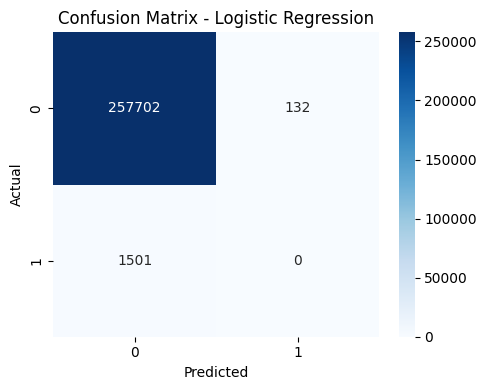


Training Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.64      0.68      0.66      1501

    accuracy                           1.00    259335
   macro avg       0.82      0.84      0.83    259335
weighted avg       1.00      1.00      1.00    259335



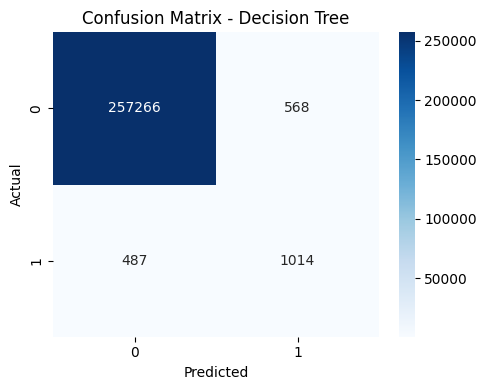


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.85      0.67      0.75      1501

    accuracy                           1.00    259335
   macro avg       0.92      0.84      0.87    259335
weighted avg       1.00      1.00      1.00    259335



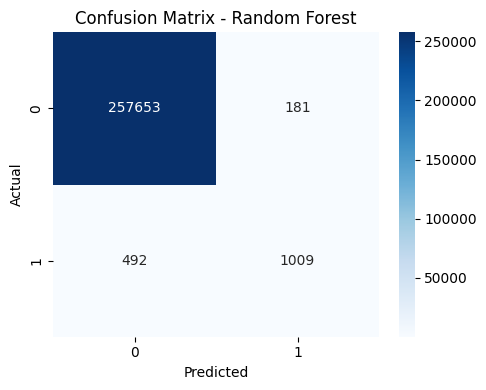

In [2]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Dataset downloaded to:", path)

csv_file = os.path.join(path, "fraudTrain.csv")
df = pd.read_csv(csv_file)

print("Dataset Sample:")
print(df.head())

df = df.drop(columns=['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'job', 'unix_time', 'trans_num'])

df = pd.get_dummies(df, columns=['category', 'gender'])

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()